# Simple Linear Regression Analysis on Salary Data

In this Jupyter notebook, I'll be exploring the world of simple linear regression using salary data. My objective is to predict salaries based on #years_of_experience, employing two distinct methodologies.

#### Section 1: Sklearn Implementation

In the initial section, I'll leverage the powerful scikit-learn library to implement simple linear regression. Scikit-learn provides an intuitive and efficient interface for various machine learning algorithms, including regression analysis. I'll utilize its functionalities to quickly build and evaluate our model.

#### Section 2: Implementation from Scratch

The subsequent section involves a more hands-on approach, where I'll construct the simple linear regression model entirely from scratch. Here, I'll delve into the underlying mathematical concepts behind linear regression, implementing necessary functions using numpy and pandas. This exercise not only reinforces my understanding of the algorithm but also provides insights into the mechanics of machine learning frameworks.

Through these two sections, I aim to explore the fundamental concepts of simple linear regression while contrasting the utilization of existing libraries with a do-it-yourself approach. Let's embark on this journey into understanding and implementing regression analysis on salary data.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

## Importing Data

In [2]:
salary_data = pd.read_csv("Salary_Data.csv")
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [4]:
# Converting data into numpy arrays
salary = salary_data.iloc[:,1:].values
years_exp = salary_data.iloc[:,:-1].values

In [5]:
print(salary,years_exp)

[[ 39343.]
 [ 46205.]
 [ 37731.]
 [ 43525.]
 [ 39891.]
 [ 56642.]
 [ 60150.]
 [ 54445.]
 [ 64445.]
 [ 57189.]
 [ 63218.]
 [ 55794.]
 [ 56957.]
 [ 57081.]
 [ 61111.]
 [ 67938.]
 [ 66029.]
 [ 83088.]
 [ 81363.]
 [ 93940.]
 [ 91738.]
 [ 98273.]
 [101302.]
 [113812.]
 [109431.]
 [105582.]
 [116969.]
 [112635.]
 [122391.]
 [121872.]
 [127345.]
 [126756.]
 [128765.]
 [135675.]
 [139465.]] [[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]
 [11.2]
 [11.5]
 [12.3]
 [12.9]
 [13.5]]


In [6]:
years_exp.shape, salary.shape

((35, 1), (35, 1))

## Visualizing Data

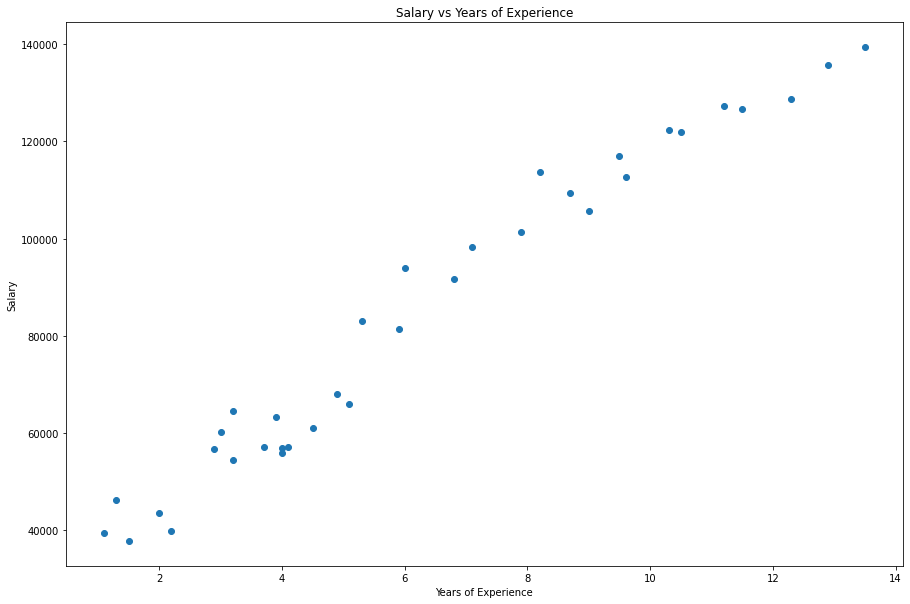

In [7]:
plt.figure(figsize=(15, 10))
plt.scatter(years_exp, salary)
plt.title("Salary vs Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

## Splitting Dataset into Train and Test Sets

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(years_exp, salary, test_size=0.2, random_state=7)

In [9]:
X_train.shape,X_test.shape

((28, 1), (7, 1))

In [10]:
Y_train.shape,Y_test.shape

((28, 1), (7, 1))

## Section - 1
### Using Scikit-learn

In [11]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [12]:
Y_pred = model.predict(X_test)

In [13]:
Y_pred.shape

(7, 1)

In [14]:
np.concatenate((Y_test,Y_pred),axis=1)

array([[37731.        , 42584.11240059],
       [81363.        , 80640.18526983],
       [46205.        , 40854.29090654],
       [57189.        , 61612.14883521],
       [57081.        , 65071.79182333],
       [98273.        , 91019.11423417],
       [67938.        , 71991.07779955]])

In [15]:
# On train data
mse = mean_squared_error(Y_train, model.predict(X_train))
r2 = r2_score(Y_train, model.predict(X_train))

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 36605297.58391665
R^2 Score: 0.9646403854946928


In [16]:
# On test data
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 29309792.40641445
R^2 Score: 0.9208424371115534


In [17]:
print("Slope =",model.coef_)
print("Intercept =",model.intercept_)

Slope = [[8649.10747028]]
Intercept = [29610.45119517]


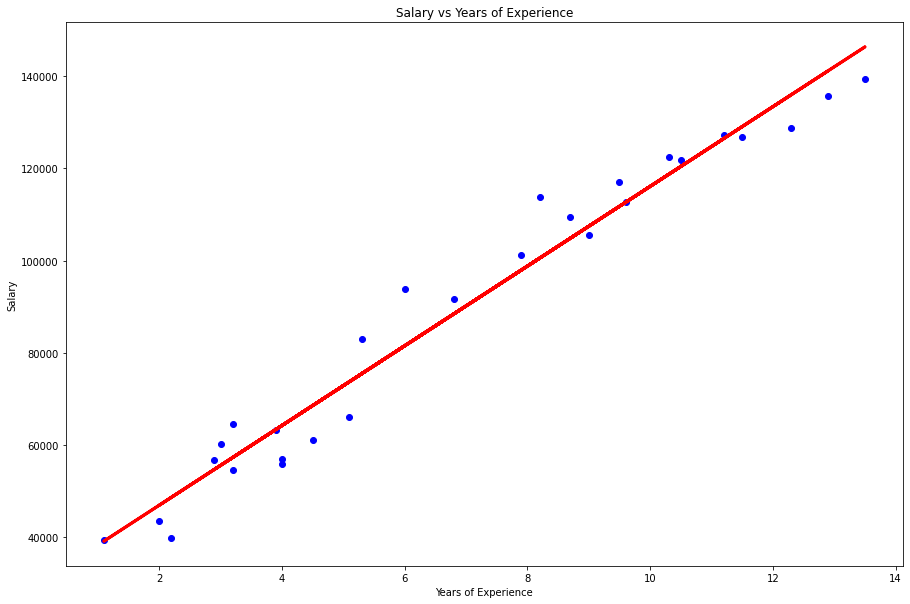

In [18]:
# Plot of train data
plt.figure(figsize=(15,10))
plt.scatter(X_train, Y_train, color='blue', label='Data')
plt.plot(X_train, model.predict(X_train), color='red', linewidth=3, label='Regression Line')
plt.title("Salary vs Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

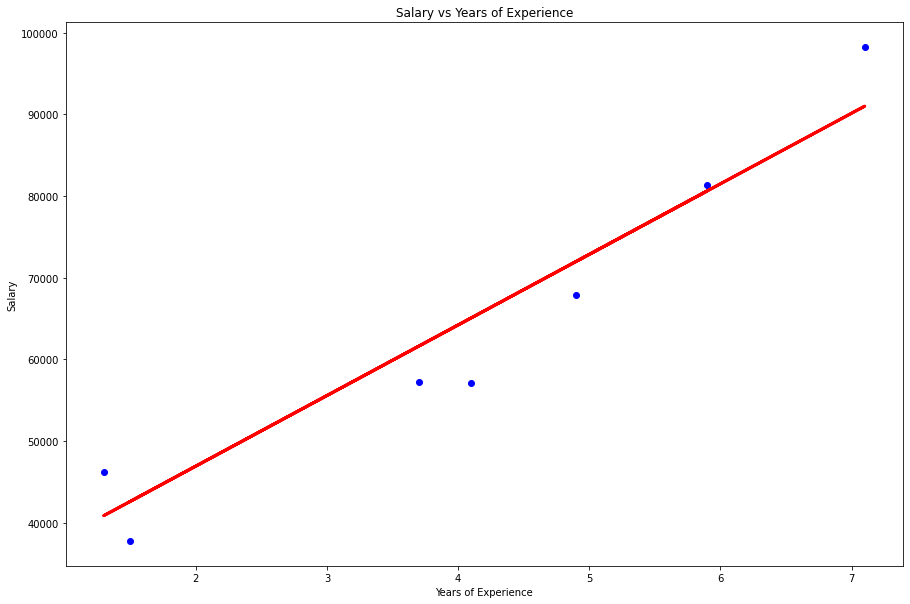

In [19]:
# Plot of test data
plt.figure(figsize=(15,10))
plt.scatter(X_test, Y_test, color='blue', label='Data')
plt.plot(X_test, Y_pred, color='red', linewidth=3, label='Regression Line')
plt.title("Salary vs Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

## Section - 2
### Without using Scikit-learn

### Initializing the variables

In [20]:
X = X_train.T
Y = Y_train.T
x_test = X_test.T
y_test = Y_test.T
W = np.zeros((X.shape[0],1))
b = 0
m = X.shape[1]

print("W =",W.shape)
print("X =",X.shape)
print("Y =",Y.shape)
print("x_test =",x_test.shape)
print("y_test =",y_test.shape)
print("m =",m)

W = (1, 1)
X = (1, 28)
Y = (1, 28)
x_test = (1, 7)
y_test = (1, 7)
m = 28


In [21]:
alpha = 0.031
n = 1000
J = []

In [22]:
W

array([[0.]])

### Model Building

In [24]:
def hypothesis(W,X,b):
    theta = (W.T).dot(X) + b
    return theta

def cost_function(X, Y, W, b, m):
    J = (1/m)*np.sum((hypothesis(W,X,b) - Y)**2)
    return J
    
def gradient_descent(n, X, Y, W, b, m, alpha):
    
    print("Cost =",cost_function(X,Y,W,b,m))
    
    for i in range(n):
        dW = (1/m)*(hypothesis(W,X,b) - Y).dot(X.T)
        db = (1/m)*np.sum(hypothesis(W,X,b) - Y)
        
        W = W - alpha*dW
        b = b - alpha*db
        
        print("\nCost at iteration-",i+1,"=","{:.6f}".format(cost_function(X,Y,W,b,m)))
        J.append(cost_function(X,Y,W,b,m))
    
    return W,b,J

In [25]:
W,b,J = gradient_descent(n,X,Y,W,b,m,alpha)

Cost = 8958237962.428572

Cost at iteration- 1 = 7298468809.921276

Cost at iteration- 2 = 5952833574.336571

Cost at iteration- 3 = 4861804761.213820

Cost at iteration- 4 = 3977136157.645943

Cost at iteration- 5 = 3259724860.462421

Cost at iteration- 6 = 2677878482.271636

Cost at iteration- 7 = 2205910748.053330

Cost at iteration- 8 = 1823003247.344196

Cost at iteration- 9 = 1512282901.521601

Cost at iteration- 10 = 1260074264.924198

Cost at iteration- 11 = 1055293526.163319

Cost at iteration- 12 = 888957355.304020

Cost at iteration- 13 = 753784831.893293

Cost at iteration- 14 = 643874813.612546

Cost at iteration- 15 = 554444448.419540

Cost at iteration- 16 = 481617242.567417

Cost at iteration- 17 = 422251292.915605

Cost at iteration- 18 = 373800071.794254

Cost at iteration- 19 = 334199595.223001

Cost at iteration- 20 = 301776974.441047

Cost at iteration- 21 = 275176298.288993

Cost at iteration- 22 = 253298561.985072

Cost at iteration- 23 = 235252980.292525

Cost a

In [26]:
W,b

(array([[8652.78710607]]), 29578.144407610103)

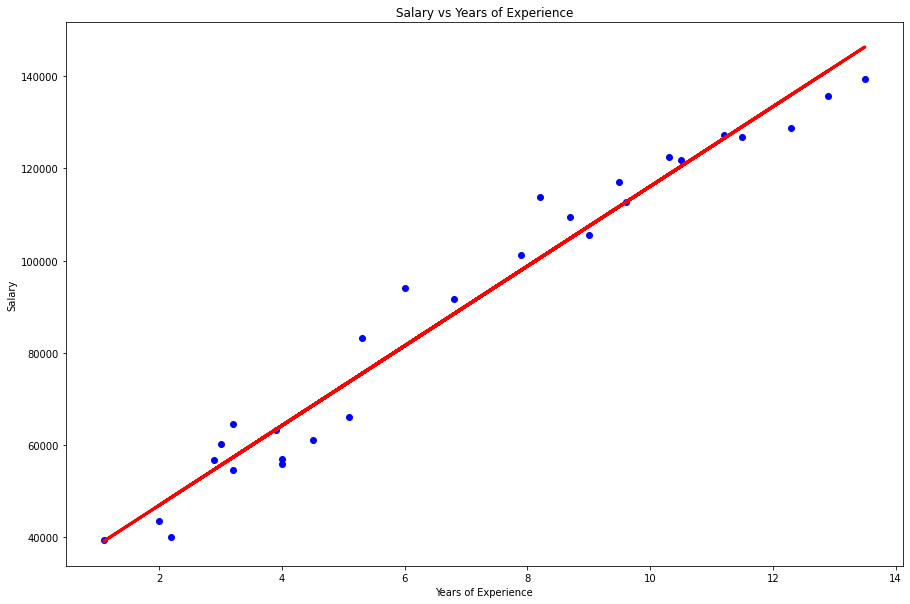

In [27]:
# Plot of train data
plt.figure(figsize=(15,10))
plt.scatter(X, Y, color='blue', label='Data')
plt.plot(X.T, hypothesis(W,X,b).T, color='red', linewidth=3, label='Regression Line')
plt.title("Salary vs Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

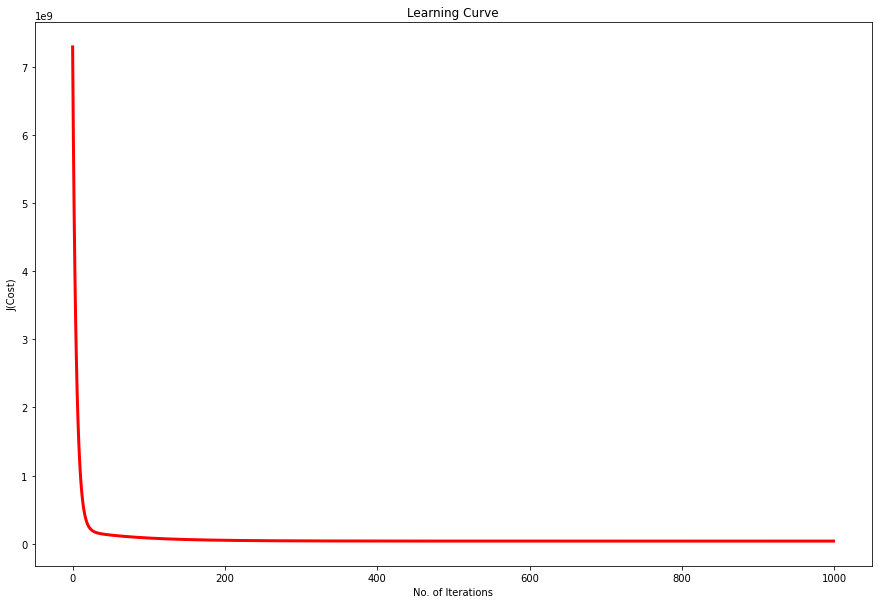

In [35]:
# Cost Function Learning Curve(train data)
plt.figure(figsize=(15,10))
plt.plot(J, color='red', linewidth=3, label='Regression Line')
plt.title("Learning Curve")
plt.xlabel("No. of Iterations")
plt.ylabel("J(Cost)")
plt.show()

### Calculating R2_Score

In [35]:
## train data
SS_res = np.sum((hypothesis(W,X,b) - Y)**2)
Y_bar = np.sum(Y)/m
SS_tot = np.sum((Y - Y_bar)**2)

R2_Score = 1 - (SS_res/SS_tot)
print("r2_score =",R2_Score)

r2_score = 0.9646401630845614


In [38]:
## test data
SS_res = np.sum((hypothesis(W,x_test,b) - y_test)**2)
Y_test_bar = np.sum(y_test)/y_test.shape[1]
SS_tot = np.sum((y_test - Y_test_bar)**2)

R2_Score = 1 - (SS_res/SS_tot)
print("r2_score =",R2_Score)
print("Cost =","{:.6f}".format(cost_function(x_test,y_test,W,b,y_test.shape[1])))

r2_score = 0.9210022754371784
Cost = 29250608.824054


### Visualizing Test Data

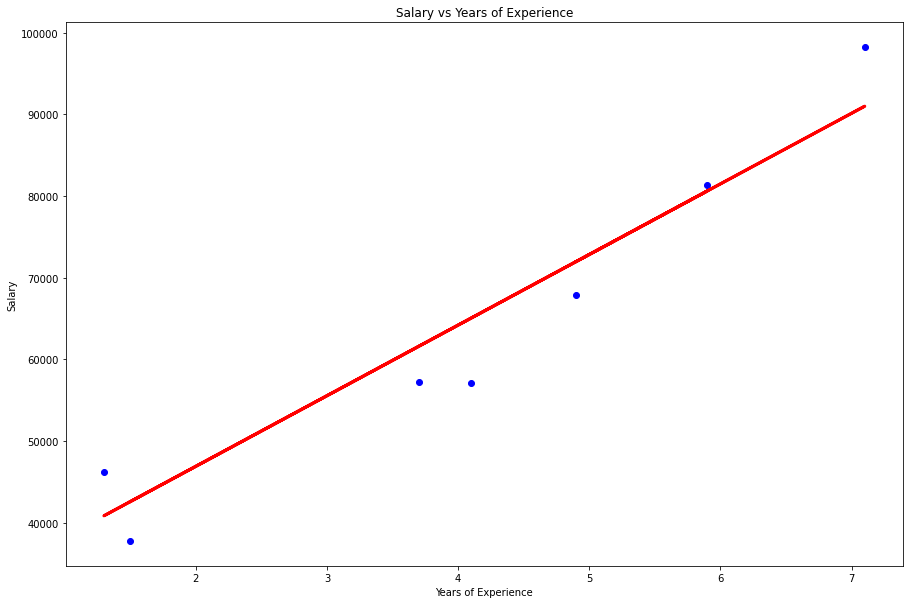

In [42]:
# Plot of test data
plt.figure(figsize=(15,10))
plt.scatter(x_test, y_test, color='blue', label='Data')
plt.plot(x_test.T, hypothesis(W,x_test,b).T, color='red', linewidth=3, label='Regression Line')
plt.title("Salary vs Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()